# Alex Huisman

## Research question/interests

I am interested in exploring trends in the global availability of clean energy. Along with exploring how clean energy availability has changed, I specifically want to analyze the adoption of individual clean energy sources. What is the most popular source of clean energy globally? What specific energy sources can be differentiated by GDP? Who actually has access to each clean energy source? Are there discrepancies between the production and consumption of each clean energy source? In analyzing this data and answering these questions, I am also excited to gain a better understanding of the world's energy use, as well as its progress in renewable energy adoption. By the end of this project, I will have built a dashboard to more easily visualize these questions I have set out to answer.

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [291]:
# Load the dataset from our repository
df = pd.read_csv('../data/raw/owid-energy-data.csv')

In [292]:
# Load descriptions of each column
codebook = pd.read_csv("https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv")

## Exploratory Data Analysis

### Exploring the Data

The first step in answering my research questions is to do a preliminary analysis on the dataset. This includes finding out how much data there is and what key information is present.

In [293]:
# Display the entire dataset
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,NaN,NaN,NaN,NaN,22.477,...,0.137,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22339,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,NaN,NaN,NaN,NaN,27.011,...,0.110,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22340,Zimbabwe,2019,ZWE,14645473.0,NaN,NaN,NaN,NaN,NaN,25.947,...,0.088,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22341,Zimbabwe,2020,ZWE,14862927.0,NaN,NaN,NaN,NaN,NaN,24.221,...,0.090,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [294]:
# Display descriptions of each column
codebook

,column,description,source
0,country,Geographic location,Our World in Data
1,year,Year of observation,Our World in Data
2,iso_code,ISO 3166-1 alpha-3 three-letter country codes,International Organization for Standardization
3,population,Population,Calculated by Our World in Data based on diffe...
4,gdp,"Total real gross domestic product, inflation-a...",Maddison Project Database
...,...,...,...
123,wind_elec_per_capita,"Per capita electricity generation from wind, m...",Calculated by Our World in Data based on BP St...
124,wind_electricity,"Electricity generation from wind, measured in ...",Calculated by Our World in Data based on BP St...
125,wind_energy_per_capita,Per capita primary energy consumption from win...,Calculated by Our World in Data based on BP St...
126,wind_share_elec,Share of electricity generation that comes fro...,Calculated by Our World in Data based on BP St...


In [295]:
# Return the physical size of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 22343 rows and 128 columns.


In [296]:
# List all columns of the dataset
print(f"The possible columns are:\n {list(df.columns)}")

The possible columns are:
 ['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_generation', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', 'g

In [297]:
# Display unique countries represented by the data
pd.DataFrame(df['country'].unique())

,0
0,Afghanistan
1,Africa
2,Africa (BP)
3,Africa (Shift)
4,Albania
...,...
309,World
310,Yemen
311,Yugoslavia
312,Zambia


In [298]:
# Display number of unique for each column
df.nunique(axis=0)

country                     314
year                        122
iso_code                    219
population                17917
gdp                       11113
                          ...  
wind_elec_per_capita       2172
wind_electricity           1656
wind_energy_per_capita     1900
wind_share_elec            1661
wind_share_energy          1108
Length: 128, dtype: int64

### Observations

Right off the bat we can see that this is a very in-depth dataset. It is very large and contains detailed information on many different forms of energy use. However, there are many fields being displayed as *NaN*, so while we can get a glimpse of what the data contains, there is clearly some cleaning and wrangling that needs to be done. Also noteworthy is the presence of "World" in the `country` column, representing global energy data.

## Data Analysis Pipeline

### Cleaning the Data

Most of the data in the dataframe appears useless, displaying as NaN. We can't just drop all NaN values otherwise we'd have no data left, so we need to make it readable instead.

In [299]:
# Convert NaN values using interpolation
df = df.interpolate()
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,6.978,74.356,144.753,1139.921,22.477,...,0.137,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22339,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,6.978,74.356,144.753,1139.921,27.011,...,0.110,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22340,Zimbabwe,2019,ZWE,14645473.0,2.271535e+10,6.978,74.356,144.753,1139.921,25.947,...,0.088,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22341,Zimbabwe,2020,ZWE,14862927.0,2.271535e+10,6.978,74.356,144.753,1139.921,24.221,...,0.090,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947


In [300]:
# Convert population to type int
df['population'] = df['population'].astype(int)
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,ZWE,14236599,2.194784e+10,6.978,74.356,144.753,1139.921,22.477,...,0.137,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22339,Zimbabwe,2018,ZWE,14438812,2.271535e+10,6.978,74.356,144.753,1139.921,27.011,...,0.110,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22340,Zimbabwe,2019,ZWE,14645473,2.271535e+10,6.978,74.356,144.753,1139.921,25.947,...,0.088,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22341,Zimbabwe,2020,ZWE,14862927,2.271535e+10,6.978,74.356,144.753,1139.921,24.221,...,0.090,1.634,16.632,679.413,4872.095,0.0,0.0,618.682,0.0,2.947


After interpolating the data, we can now be confident that NaN values are genuine missing data. We can finally start to make meaningful analyses on the data. 

### Wrangling the Data

My research will mostly relate to clean energy. Looking at the codebook, I can see the presence of columns relating to coal, fossil, gas, nuclear, and oil. These are not relevant to my research questions, so I can reduce my dataframes.

In [301]:
# Remove rows relating to coal, fossil, gas, and oil
cb = codebook[codebook["column"].str.contains("coal|fossil|gas|oil")==False]
cb

,column,description,source
0,country,Geographic location,Our World in Data
1,year,Year of observation,Our World in Data
2,iso_code,ISO 3166-1 alpha-3 three-letter country codes,International Organization for Standardization
3,population,Population,Calculated by Our World in Data based on diffe...
4,gdp,"Total real gross domestic product, inflation-a...",Maddison Project Database
...,...,...,...
123,wind_elec_per_capita,"Per capita electricity generation from wind, m...",Calculated by Our World in Data based on BP St...
124,wind_electricity,"Electricity generation from wind, measured in ...",Calculated by Our World in Data based on BP St...
125,wind_energy_per_capita,Per capita primary energy consumption from win...,Calculated by Our World in Data based on BP St...
126,wind_share_elec,Share of electricity generation that comes fro...,Calculated by Our World in Data based on BP St...


In [302]:
# Remove the same columns for other dataframe
df = df[df.columns.drop(list(df.filter(regex='coal')))]
df = df[df.columns.drop(list(df.filter(regex='fossil')))]
df = df[df.columns.drop(list(df.filter(regex='gas')))]
df = df[df.columns.drop(list(df.filter(regex='oil')))]
df.head(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have now removed the rows and columns related to nonrenewable energy. Most of the data now focuses on renewable energy data.

### Data Analysis

In [303]:
df1 = df.dropna()
df1

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
994,Argentina,1990,ARG,32618648,3.387512e+11,46.306022,0.000033,0.000,0.000,17.105297,...,0.000,0.000,51.401778,0.000,0.000,0.0,0.0,0.000,0.0,0.000
995,Argentina,1991,ARG,33079004,3.760579e+11,46.369402,0.000000,0.000,0.000,17.293267,...,0.000,0.000,51.446667,0.000,0.000,0.0,0.0,0.000,0.0,0.000
996,Argentina,1992,ARG,33529320,4.166798e+11,46.432782,0.000000,0.000,0.000,17.481238,...,0.000,0.000,51.491556,0.000,0.000,0.0,0.0,0.000,0.0,0.000
997,Argentina,1993,ARG,33970100,4.447802e+11,46.496162,0.000000,0.000,0.000,17.669208,...,0.000,0.000,51.536444,0.000,0.000,0.0,0.0,0.000,0.0,0.000
998,Argentina,1994,ARG,34402668,4.729267e+11,46.559542,0.000000,0.000,0.000,17.857178,...,0.000,0.000,51.581333,0.000,0.000,0.0,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,ZWE,14236599,2.194784e+10,6.978000,74.356000,144.753,1139.921,22.477000,...,0.137,1.634,16.632000,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22339,Zimbabwe,2018,ZWE,14438812,2.271535e+10,6.978000,74.356000,144.753,1139.921,27.011000,...,0.110,1.634,16.632000,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22340,Zimbabwe,2019,ZWE,14645473,2.271535e+10,6.978000,74.356000,144.753,1139.921,25.947000,...,0.088,1.634,16.632000,679.413,4872.095,0.0,0.0,618.682,0.0,2.947
22341,Zimbabwe,2020,ZWE,14862927,2.271535e+10,6.978000,74.356000,144.753,1139.921,24.221000,...,0.090,1.634,16.632000,679.413,4872.095,0.0,0.0,618.682,0.0,2.947


In [304]:
rq1 = df1[(df1["year"]==2021)]
rq1

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1025,Argentina,2021,ARG,45605824,2.191767e+11,8.019000,0.774000,228.469000,10.420000,17.542000,...,1.440000,0.603000,37.478000,9.138000,33.853000,283.682,12.938,742.304000,8.486,3.551000
1055,Armenia,2021,ARM,2968128,3.322159e+10,10.039263,0.672603,214.537963,9.048947,0.000000,...,0.267000,0.464908,81.739847,7.061182,26.100405,0.000,0.000,572.310718,0.000,2.737794
1548,Australia,2021,AUS,25788216,1.155983e+12,2.675000,0.032000,47.602000,1.228000,120.985000,...,11.663000,5.137000,18.530000,10.744000,70.116000,1039.074,26.796,2718.922000,10.019,4.413000
1710,Austria,2021,AUT,9043072,1.384538e+11,0.393000,0.020000,552.510000,4.996000,445.645000,...,2.878000,1.350000,-0.584000,-0.169000,17.668000,746.637,6.752,1953.707000,9.144,4.290000
1747,Azerbaijan,2021,AZE,10223344,1.553723e+11,11.089506,0.018706,516.708126,4.672266,0.000000,...,0.198000,0.079000,-4.891000,-0.013000,0.239000,8.940,0.091,23.394000,0.328,0.131000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21372,Uzbekistan,2021,UZB,33935764,3.147293e+11,6.737056,23.202951,853.693208,286.732760,0.000000,...,0.071000,0.024000,-99.210369,0.001000,0.001000,0.007,0.000,0.019000,0.000,0.000000
21535,Venezuela,2021,VEN,28704948,2.587661e+11,5.299731,16.227596,595.385497,202.439371,0.000000,...,0.004000,0.001000,-0.273000,-0.001000,0.218000,2.902,0.083,7.593000,0.109,0.039000
21657,Vietnam,2021,VNM,98168832,7.048190e+11,4.223941,11.006778,402.050891,139.348614,0.000000,...,10.528000,5.620000,122.726000,3.438000,6.258000,24.362,2.392,63.748000,0.977,0.522000
22007,Yemen,2021,YEM,30490638,2.834808e+10,6.978000,74.356000,144.753000,1139.921000,0.009897,...,15.305696,1.634000,16.632000,679.413000,4872.095000,0.000,0.000,618.682000,0.000,2.947000


In [305]:
rq1 = df[df['country'].str.contains('World')]
rq1 = rq1[(rq1["year"]==2021)]
rq1

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21965,World,2021,NaN,7874955758,2.843254e+13,6.978,74.356,144.753,1139.921,84.417,...,3.627,1.634,16.632,679.413,4872.095,236.438,1861.94,618.682,6.541,2.947


In [306]:
rq1a = rq1[["country", "biofuel_electricity", "hydro_electricity", "nuclear_electricity", "solar_electricity", "wind_electricity", "other_renewable_electricity"]]

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Most Common Renewable Energy Source In the World')

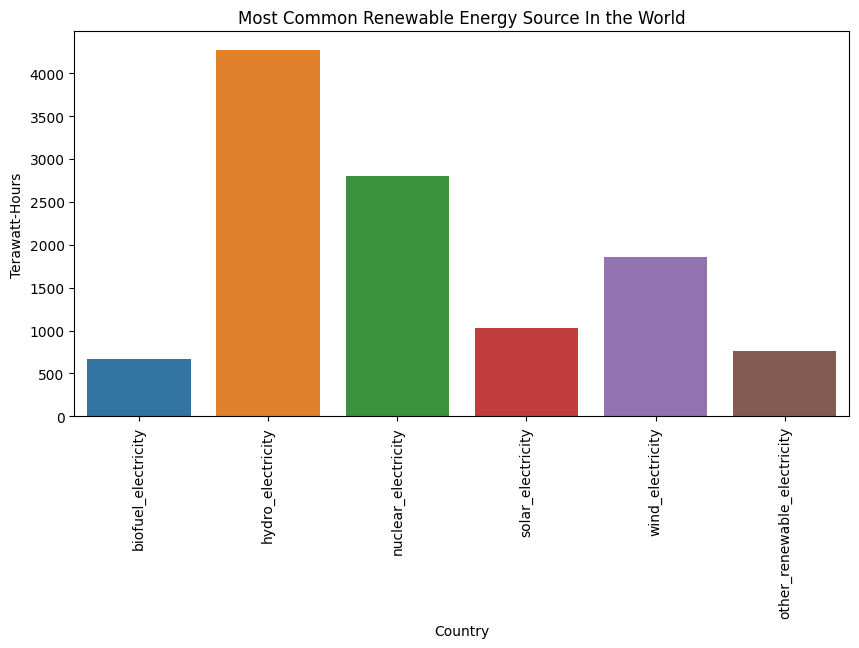

In [307]:
plt.figure(figsize=(10, 5))
sns.barplot(data=rq1a)
plt.ylabel('Terawatt-Hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Most Common Renewable Energy Source In the World')

In [308]:
rq2 = df1[(df1["year"]==2021)]
rq2 = rq2.nsmallest(n=10, columns=['renewables_electricity'])
rq2

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
19968,Trinidad and Tobago,2021,TTO,1403374,2.903860e+10,230.292247,-1.232110,260.866635,18.247521,0.000000,...,0.052000,0.007000,164.114097,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1910,Bahrain,2021,BHR,1748295,6.126719e+10,58.211951,0.013007,358.986357,3.246088,0.000000,...,0.032621,0.024204,-1.949181,-0.004021,0.073226,0.00000,0.000000,7.167523,0.000000,0.040136
20249,Turkmenistan,2021,TKM,6117933,1.435823e+11,428.176669,-0.889315,188.216958,13.165704,0.000000,...,0.025000,0.004000,23.637955,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3034,Brunei,2021,BRN,441532,1.919717e+11,65.544584,8.500223,937.109301,168.536852,0.000000,...,0.000000,0.361991,252.902342,11.453213,54.514559,0.00000,0.000000,254.748760,0.000000,1.561808
10335,Kuwait,2021,KWT,4328553,8.396494e+10,3.400799,0.387490,169.977470,10.260993,0.000000,...,0.072000,0.032000,-0.273000,-0.000000,0.010000,0.84100,0.004000,2.201000,0.005000,0.002000
10709,Libya,2021,LBY,6958538,6.084967e+10,2.981790,0.282169,123.743598,7.470003,0.000000,...,0.028286,0.000717,44.367263,-0.002806,0.008749,0.00000,0.000000,4.690590,0.000000,0.020749
4039,Chad,2021,TCD,16914984,1.531761e+10,112.603451,0.514971,228.048522,8.681189,0.057510,...,0.000000,0.581973,3.730802,0.262664,3.120187,0.59991,0.009851,358.008027,3.529954,0.782320
8635,Hong Kong,2021,HKG,7552800,1.077513e+11,-8.468349,-1.459757,128.315914,10.765801,0.020946,...,0.022000,0.009000,2.564000,0.000000,0.002000,0.10900,0.001000,0.284000,0.002000,0.001000
6011,Equatorial Guinea,2021,GNQ,1449891,2.301124e+10,14.846894,0.492843,60.637169,2.350313,0.000000,...,0.000000,0.198000,220.955677,0.569356,5.630308,0.00000,0.000000,54.003795,0.000000,0.534205
17008,Qatar,2021,QAT,2930524,3.743904e+11,38.554940,0.683501,322.887561,3.283060,19.811545,...,0.016000,0.004000,-51.684605,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Top 10 Countries With the Lowest Renewable Energy Production')

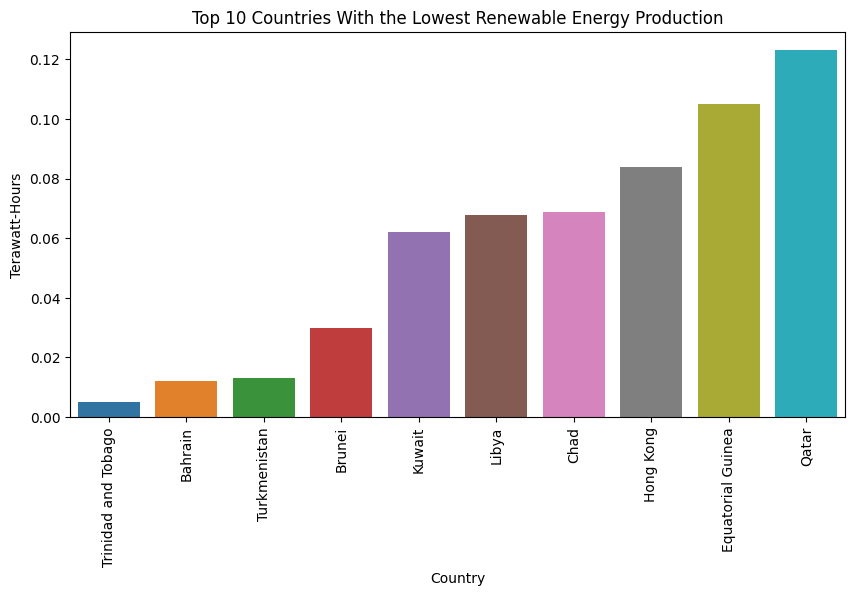

In [323]:
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='renewables_electricity', data=rq2)
plt.ylabel('Terawatt-Hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Top 10 Countries With the Lowest Renewable Energy Production')

In [321]:
rq2b = df1[(df1["year"]==2021)]
rq2b = rq2b.nsmallest(n=25, columns=['renewables_electricity'])
rq2b

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
19968,Trinidad and Tobago,2021,TTO,1403374,2.903860e+10,230.292247,-1.232110,260.866635,18.247521,0.000000,...,0.052000,0.007000,164.114097,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1910,Bahrain,2021,BHR,1748295,6.126719e+10,58.211951,0.013007,358.986357,3.246088,0.000000,...,0.032621,0.024204,-1.949181,-0.004021,0.073226,0.00000,0.000000,7.167523,0.000000,0.040136
20249,Turkmenistan,2021,TKM,6117933,1.435823e+11,428.176669,-0.889315,188.216958,13.165704,0.000000,...,0.025000,0.004000,23.637955,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3034,Brunei,2021,BRN,441532,1.919717e+11,65.544584,8.500223,937.109301,168.536852,0.000000,...,0.000000,0.361991,252.902342,11.453213,54.514559,0.00000,0.000000,254.748760,0.000000,1.561808
10335,Kuwait,2021,KWT,4328553,8.396494e+10,3.400799,0.387490,169.977470,10.260993,0.000000,...,0.072000,0.032000,-0.273000,-0.000000,0.010000,0.84100,0.004000,2.201000,0.005000,0.002000
10709,Libya,2021,LBY,6958538,6.084967e+10,2.981790,0.282169,123.743598,7.470003,0.000000,...,0.028286,0.000717,44.367263,-0.002806,0.008749,0.00000,0.000000,4.690590,0.000000,0.020749
4039,Chad,2021,TCD,16914984,1.531761e+10,112.603451,0.514971,228.048522,8.681189,0.057510,...,0.000000,0.581973,3.730802,0.262664,3.120187,0.59991,0.009851,358.008027,3.529954,0.782320
8635,Hong Kong,2021,HKG,7552800,1.077513e+11,-8.468349,-1.459757,128.315914,10.765801,0.020946,...,0.022000,0.009000,2.564000,0.000000,0.002000,0.10900,0.001000,0.284000,0.002000,0.001000
6011,Equatorial Guinea,2021,GNQ,1449891,2.301124e+10,14.846894,0.492843,60.637169,2.350313,0.000000,...,0.000000,0.198000,220.955677,0.569356,5.630308,0.00000,0.000000,54.003795,0.000000,0.534205
17008,Qatar,2021,QAT,2930524,3.743904e+11,38.554940,0.683501,322.887561,3.283060,19.811545,...,0.016000,0.004000,-51.684605,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Top 25 Countries With the Lowest Renewable Energy Production')

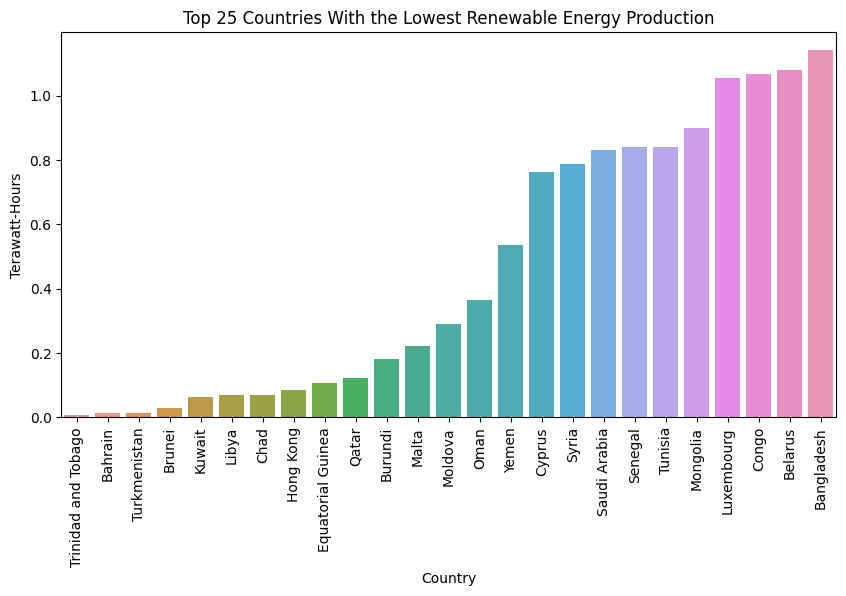

In [322]:
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='renewables_electricity', data=rq2b)
plt.ylabel('Terawatt-Hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Top 25 Countries With the Lowest Renewable Energy Production')

In [312]:
rq3 = df1[(df1["year"]==2021)]
rq3

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1025,Argentina,2021,ARG,45605824,2.191767e+11,8.019000,0.774000,228.469000,10.420000,17.542000,...,1.440000,0.603000,37.478000,9.138000,33.853000,283.682,12.938,742.304000,8.486,3.551000
1055,Armenia,2021,ARM,2968128,3.322159e+10,10.039263,0.672603,214.537963,9.048947,0.000000,...,0.267000,0.464908,81.739847,7.061182,26.100405,0.000,0.000,572.310718,0.000,2.737794
1548,Australia,2021,AUS,25788216,1.155983e+12,2.675000,0.032000,47.602000,1.228000,120.985000,...,11.663000,5.137000,18.530000,10.744000,70.116000,1039.074,26.796,2718.922000,10.019,4.413000
1710,Austria,2021,AUT,9043072,1.384538e+11,0.393000,0.020000,552.510000,4.996000,445.645000,...,2.878000,1.350000,-0.584000,-0.169000,17.668000,746.637,6.752,1953.707000,9.144,4.290000
1747,Azerbaijan,2021,AZE,10223344,1.553723e+11,11.089506,0.018706,516.708126,4.672266,0.000000,...,0.198000,0.079000,-4.891000,-0.013000,0.239000,8.940,0.091,23.394000,0.328,0.131000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21372,Uzbekistan,2021,UZB,33935764,3.147293e+11,6.737056,23.202951,853.693208,286.732760,0.000000,...,0.071000,0.024000,-99.210369,0.001000,0.001000,0.007,0.000,0.019000,0.000,0.000000
21535,Venezuela,2021,VEN,28704948,2.587661e+11,5.299731,16.227596,595.385497,202.439371,0.000000,...,0.004000,0.001000,-0.273000,-0.001000,0.218000,2.902,0.083,7.593000,0.109,0.039000
21657,Vietnam,2021,VNM,98168832,7.048190e+11,4.223941,11.006778,402.050891,139.348614,0.000000,...,10.528000,5.620000,122.726000,3.438000,6.258000,24.362,2.392,63.748000,0.977,0.522000
22007,Yemen,2021,YEM,30490638,2.834808e+10,6.978000,74.356000,144.753000,1139.921000,0.009897,...,15.305696,1.634000,16.632000,679.413000,4872.095000,0.000,0.000,618.682000,0.000,2.947000


In [313]:
rq3a = rq3.nlargest(n=25, columns=['renewables_electricity'])
rq3a

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
4283,China,2021,CHN,1444216064,4.541170e+12,25.274000,6.033000,20.704000,29.901000,114.498000,...,3.832,1.954,40.536,490.329,1715.493,453.949,655.600,1187.837,7.682,3.917
21130,United States,2021,USA,332915072,1.781532e+13,8.871000,33.559000,1237.193000,411.880000,166.649000,...,3.753,1.675,12.378,107.278,1003.766,1152.256,383.603,3015.081,8.706,3.887
2871,Brazil,2021,BRA,213993440,2.915279e+12,5.306000,12.871000,1193.830000,255.472000,229.306000,...,2.560,1.256,26.705,39.317,189.149,337.795,72.286,883.901,11.047,5.419
3660,Canada,2021,CAN,38067916,4.176505e+11,6.288000,1.427000,633.825000,24.128000,253.757000,...,0.805,0.349,-1.473,-1.716,91.890,922.484,35.117,2413.842,5.478,2.374
9136,India,2021,IND,1393409024,2.247872e+12,20.318000,4.496000,19.109000,26.627000,23.690000,...,3.983,1.816,12.688,19.481,178.181,48.869,68.094,127.874,3.971,1.811
7595,Germany,2021,DEU,83900472,3.200652e+12,-11.925000,-4.683000,412.249000,34.588000,583.906000,...,8.383,3.651,-10.902,-38.955,307.983,1402.853,117.700,3670.812,20.136,8.770
17208,Russia,2021,RUS,145912016,9.097963e+11,53.587996,0.584729,276.193770,2.808286,3.701000,...,0.200,0.070,127.135,3.775,6.764,17.715,2.585,46.355,0.223,0.078
10031,Japan,2021,JPN,126050800,1.228336e+12,3.741384,0.473098,207.557944,12.529606,326.218000,...,8.460,4.581,5.507,1.052,21.587,65.449,8.250,171.259,0.809,0.438
14280,Norway,2021,NOR,5465629,4.475879e+11,15.427647,0.160691,302.601613,1.012811,45.740000,...,0.125,0.091,18.727,4.761,30.791,2152.916,11.767,5633.483,7.491,5.420
18651,Spain,2021,ESP,46745212,3.909626e+11,-4.381000,-0.698000,325.851000,15.232000,145.469000,...,9.850,4.516,10.471,14.922,163.160,1333.908,62.354,3490.406,22.913,10.505


Text(0.5, 1.0, 'Top 25 Countries With the Highest Renewable Energy Production')

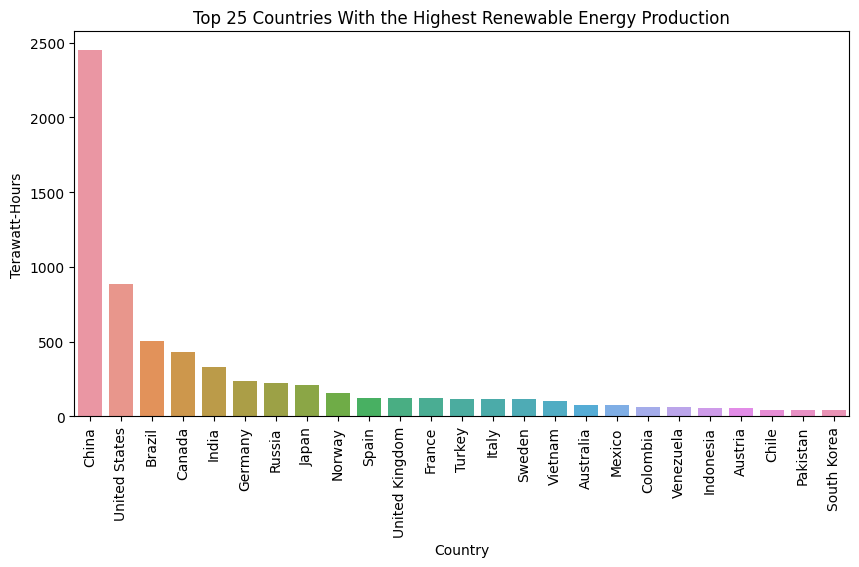

In [314]:
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='renewables_electricity', data=rq3a)
plt.ylabel('Terawatt-Hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Top 25 Countries With the Highest Renewable Energy Production')

In [315]:
# rq3a = rq3.nlargest(n=25, columns=['renewables_electricity'])
rq3b = rq3a[["country", "renewables_electricity", "gdp"]]
rq3b

,country,renewables_electricity,gdp
4283,China,2452.532,4.541170e+12
21130,United States,882.140,1.781532e+13
2871,Brazil,506.816,2.915279e+12
3660,Canada,430.821,4.176505e+11
9136,India,332.199,2.247872e+12
7595,Germany,236.700,3.200652e+12
17208,Russia,219.949,9.097963e+11
10031,Japan,207.910,1.228336e+12
14280,Norway,155.308,4.475879e+11
18651,Spain,125.342,3.909626e+11


In [316]:
# Convert population to type int
rq3b['gdp'] = rq3b['gdp'].astype(int)

/var/folders/s4/782xpdwd28z00nlp05clrsz80000gn/T/ipykernel_43466/1967712747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq3b['gdp'] = rq3b['gdp'].astype(int)


Text(0.5, 1.0, 'Top 25 Countries With the Highest Renewable Energy Production')

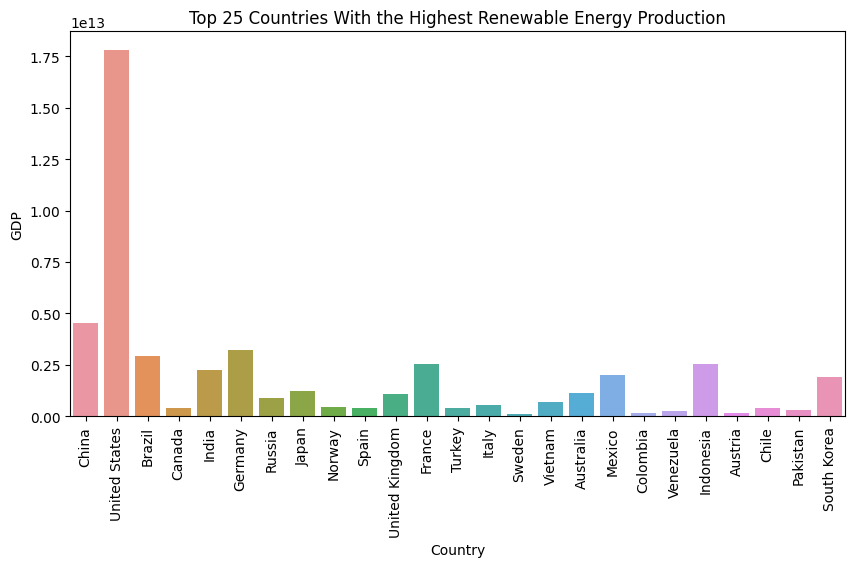

In [317]:
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='gdp', data=rq3a)
plt.ylabel('GDP')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Top 25 Countries With the Highest Renewable Energy Production')